<a href="https://colab.research.google.com/github/cam2149/MachineLearningII/blob/main/03-DecStump-Ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerías necesarias

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import tree, datasets, metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
import math

Cargamos el conjunto de datos de cancer de mama

In [12]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
data = np.concatenate((X, np.expand_dims(y, axis=1)), axis = 1)
#data[0:5]

Realizamos la clasificación de si el tumor es benigno o maligno a partir de un decision stump. Es decir, un árbol de decisión de un sólo nivel.

In [13]:
np.random.seed(1234)
decStump = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)

Utilizamos un 70% de los datos para entrenamiento y un 30% para la prueba

In [14]:
np.random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Entrenamos el decision stump

In [15]:
decStump.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

Realizamos las predicciones a partir de nuestro decision stump con los datos de entrenamiento

In [16]:
y_pred = decStump.predict(X_train)

Calculamos la matriz de confusión para el modelo evaluado con los datos de entrenamiento

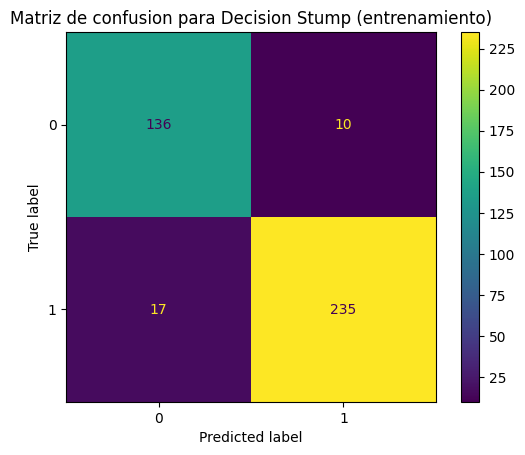

In [17]:
cm = confusion_matrix(y_train, y_pred, labels=decStump.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decStump.classes_)
disp.plot()
plt.title("Matriz de confusion para Decision Stump (entrenamiento)")
plt.show()

Calculamos la exactitud y el kappa utilizando los datos de entrenamiento

In [18]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_train, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_train, y_pred))

[[136  10]
 [ 17 235]]
Exactitud:  0.9321608040201005
Kappa    :  0.8554207141511718


Realizamos las predicciones a partir de nuestro decision stump con los datos de prueba

In [19]:
y_pred = decStump.predict(X_test)

Calculamos la matriz de confusión para el modelo evaluado con los datos de prueba

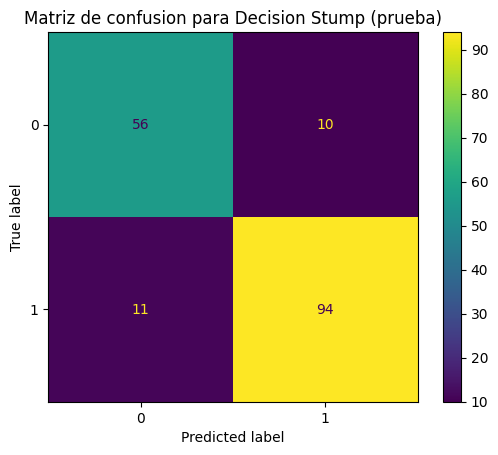

In [20]:
cm = confusion_matrix(y_test, y_pred, labels=decStump.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decStump.classes_)
disp.plot()
plt.title("Matriz de confusion para Decision Stump (prueba)")
plt.show()

Calculamos la exactitud y el kappa utilizando los datos de prueba

In [21]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

[[56 10]
 [11 94]]
Exactitud:  0.8771929824561403
Kappa    :  0.741636088927261


Graficamos nuestro decision stump

[Text(0.5, 0.75, 'mean concave points <= 0.051\nentropy = 0.948\nsamples = 398\nvalue = [146, 252]\nclass = benign'),
 Text(0.25, 0.25, 'entropy = 0.246\nsamples = 245\nvalue = [10, 235]\nclass = benign'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'entropy = 0.503\nsamples = 153\nvalue = [136, 17]\nclass = malignant'),
 Text(0.625, 0.5, '  False')]

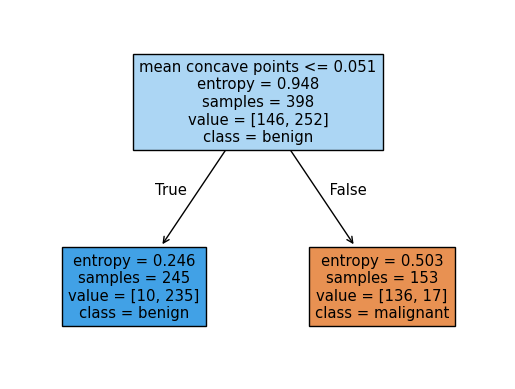

In [22]:
tree.plot_tree(decStump, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)

Ahora comparemos el resultado con KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

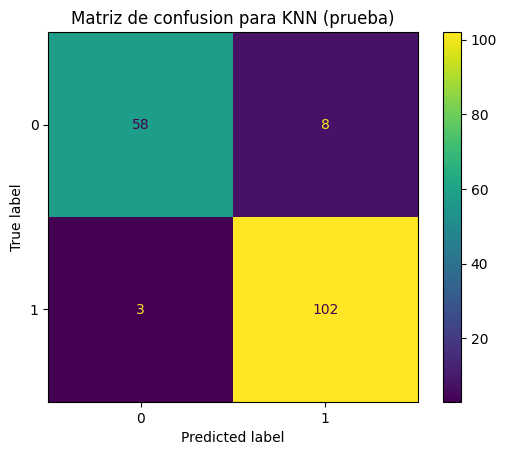

In [24]:
cm = confusion_matrix(y_test, y_pred, labels=decStump.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decStump.classes_)
disp.plot()
plt.title("Matriz de confusion para KNN (prueba)")
plt.show()